In [1]:
#установка рабочего модуля
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/unir')

#импорт модулей
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE, SMOTENC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import tree
import graphviz
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.utils import to_categorical
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
#чтение датафрейма из файла .csv
df = pd.read_csv('LUNG.csv')
print(df.shape)
print(df.dtypes)

In [ ]:
#основные хар-ки данных
df.describe().T

In [ ]:
#тепловая карта
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), annot = True, linewidths = 1, cmap = 'coolwarm', linecolor = "black")

In [ ]:
plt.boxplot(df['AGE'])

In [ ]:
df.info()

In [ ]:
#статистика заболевших по аллергикам
sns.countplot(x = 'ALLERGY', hue = 'LUNG', data = df_sm, edgecolor = 'black')

In [ ]:
#распределение данных
fn = df.columns.values.tolist()
fig, axis = plt.subplots(nrows= 4 , ncols= 4,)
fig.set_figheight(14)
fig.set_figwidth(13)
for i in range(4):
  for j in range(4):
    axis[i][j].hist(x = fn[i*4+j], data = df, color = 'lightgreen', edgecolor = 'black' )
    axis[i][j].set_title(fn[i*4+j])

In [6]:
#передискретизация
cf = [0,2,3,4,5,6,7,8,9,10,11,12,13,14]
sm = SMOTENC(random_state = 100, categorical_features = cf, )

x_sm, y_sm = sm.fit_resample(df.drop("LUNG", axis=1), df["LUNG"])

df_sm = pd.concat([x_sm, y_sm], axis=1)
df_sm

,GENDER,AGE,SMOKING,YELLOW,ANXIETY,PEER,CHRONIC,FATIGUE,ALLERGY,WHEEZING,ALCOHOL,COUGHING,SHORTNESS,SWALLOWING,CHEST,LUNG
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,2
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,2
2,2,59,1,1,1,2,1,2,1,2,1,2,2,1,2,1
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,1
4,2,63,1,2,1,1,1,1,1,2,1,2,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,1,68,2,1,2,2,2,1,1,1,1,1,1,1,1,1
536,2,63,2,1,1,2,1,1,1,1,1,1,2,1,1,1
537,2,58,1,1,1,1,1,2,1,2,1,1,2,1,1,1
538,1,58,1,2,2,1,1,1,1,1,1,1,1,2,1,1


In [7]:
#нормировка возраста (непр. величин)
scaler = StandardScaler()
cols_to_scale = ['AGE']
scaler.fit(df_sm[cols_to_scale])
df_sm[cols_to_scale] = scaler.transform(df_sm[cols_to_scale])
df_sm.head(3)

,GENDER,AGE,SMOKING,YELLOW,ANXIETY,PEER,CHRONIC,FATIGUE,ALLERGY,WHEEZING,ALCOHOL,COUGHING,SHORTNESS,SWALLOWING,CHEST,LUNG
0,1,0.951599,1,2,2,1,1,2,1,2,2,2,2,2,2,2
1,1,1.579333,2,1,1,1,2,2,2,1,1,1,2,2,2,2
2,2,-0.303870,1,1,1,2,1,2,1,2,1,2,2,1,2,1


In [ ]:
df_sm["GENDER"] = df_sm["GENDER"].apply(lambda x: 1 if x == 2 else 0)
df_sm["SMOKING"] = df_sm["SMOKING"].apply(lambda x: 1 if x == 2 else 0)
df_sm["YELLOW"] = df_sm["YELLOW"].apply(lambda x: 1 if x == 2 else 0)
df_sm["ANXIETY"] = df_sm["ANXIETY"].apply(lambda x: 1 if x == 2 else 0)
df_sm["PEER"] = df_sm["PEER"].apply(lambda x: 1 if x == 2 else 0)
df_sm["CHRONIC"] = df_sm["CHRONIC"].apply(lambda x: 1 if x == 2 else 0)
df_sm["FATIGUE"] = df_sm["FATIGUE"].apply(lambda x: 1 if x == 2 else 0)
df_sm["ALLERGY"] = df_sm["ALLERGY"].apply(lambda x: 1 if x == 2 else 0)
df_sm["WHEEZING"] = df_sm["WHEEZING"].apply(lambda x: 1 if x == 2 else 0)
df_sm["ALCOHOL"] = df_sm["ALCOHOL"].apply(lambda x: 1 if x == 2 else 0)
df_sm["COUGHING"] = df_sm["COUGHING"].apply(lambda x: 1 if x == 2 else 0)
df_sm["SHORTNESS"] = df_sm["SHORTNESS"].apply(lambda x: 1 if x == 2 else 0)
df_sm["SWALLOWING"] = df_sm["SWALLOWING"].apply(lambda x: 1 if x == 2 else 0)
df_sm["CHEST"] = df_sm["CHEST"].apply(lambda x: 1 if x == 2 else 0)
df_sm["LUNG"] = df_sm["LUNG"].apply(lambda x: 1 if x == 2 else 0)

df_sm

In [ ]:
#разделение на обучающие и тестовые данные RS = 100
df_sm_train, df_sm_test = train_test_split(df_sm, test_size = 108,
                 train_size = 432,
                  random_state = 100)

print(df_sm_train)

In [10]:
#выделение членов целевой функции
X_train = df_sm_train.drop('LUNG', axis = 1)
Y_train = df_sm_train['LUNG']
X_test = df_sm_test.drop('LUNG', axis = 1)
Y_test = df_sm_test['LUNG']

In [ ]:
#LR
model = LogisticRegression()
model.fit(X_train,Y_train)

In [ ]:
y_pred_lr = model.predict(X_test)

conf_matrix = confusion_matrix(Y_test, y_pred_lr)

conf_matrix_df = pd.DataFrame(conf_matrix)
conf_matrix_df

conf_matrix_labels = pd.DataFrame(conf_matrix, columns = ['Прогноз рак', 'Прогноз здоров'], index = ['Факт рак', 'Факт здоров'])
print(conf_matrix_labels)

model_accuracy = accuracy_score(Y_test, y_pred_lr)
print('-----------------------------------------')
LR_ac = round(model_accuracy, 3)
print('LR Accuracy = ', LR_ac)

             Прогноз рак  Прогноз здоров
Факт рак              52               3
Факт здоров            2              51
-----------------------------------------
LR Accuracy =  0.954


In [ ]:
#модель ДР
dr = DecisionTreeClassifier(criterion="gini", max_depth=3)
drf = dr.fit(X_train, Y_train)

In [ ]:
y_pred_dr = dr.predict(X_test)

conf_matrix = confusion_matrix(Y_test, y_pred_dr)

conf_matrix_df = pd.DataFrame(conf_matrix)
conf_matrix_df

conf_matrix_labels = pd.DataFrame(conf_matrix, columns = ['Прогноз рак', 'Прогноз здоров'], index = ['Факт рак', 'Факт здоров'])
print(conf_matrix_labels)

model_accuracy = accuracy_score(Y_test, y_pred_dr)
print('-----------------------------------------')
DR_ac = round(model_accuracy, 3)
print('DR Accuracy = ', DR_ac)

In [ ]:
#ДР
fn = df_sm.columns.values.tolist()
dot_data = tree.export_graphviz(drf,filled = True, class_names = ['HEALTHY WELL','LUNG'],
                                rounded = True, feature_names = fn[:-1], max_depth = 4)
graph = graphviz.Source(dot_data)
graph

In [ ]:
#KNN
knn = KNeighborsClassifier()
knn.fit(X_train,Y_train)

In [ ]:
y_pred_knn = knn.predict(X_test)

conf_matrix = confusion_matrix(Y_test, y_pred_knn)

conf_matrix_df = pd.DataFrame(conf_matrix)
conf_matrix_df

conf_matrix_labels = pd.DataFrame(conf_matrix, columns = ['Прогноз рак', 'Прогноз здоров'], index = ['Факт рак', 'Факт здоров'])
print(conf_matrix_labels)

model_accuracy = accuracy_score(Y_test, y_pred_knn)
print('-----------------------------------------')
KNN_ac = round(model_accuracy, 3)
print('KNN Accuracy = ', KNN_ac)

In [ ]:
#RF
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train,Y_train)

In [ ]:
y_pred_rfc = rfc.predict(X_test)
conf_matrix = confusion_matrix(Y_test, y_pred_rfc)

conf_matrix_df = pd.DataFrame(conf_matrix)
conf_matrix_df

conf_matrix_labels = pd.DataFrame(conf_matrix, columns = ['Прогноз рак', 'Прогноз здоров'], index = ['Факт рак', 'Факт здоров'])
print(conf_matrix_labels)

model_accuracy = accuracy_score(Y_test, y_pred_rfc)
print('-----------------------------------------')
RF_ac = round(model_accuracy, 3)
print('RF Accuracy = ', RF_ac)

In [ ]:
#GBC
gb = GradientBoostingClassifier()
gb.fit(X_train, Y_train)

In [ ]:
y_pred_gbc = rfc.predict(X_test)
conf_matrix = confusion_matrix(Y_test, y_pred_gbc)

conf_matrix_df = pd.DataFrame(conf_matrix)
conf_matrix_df

conf_matrix_labels = pd.DataFrame(conf_matrix, columns = ['Прогноз рак', 'Прогноз здоров'], index = ['Факт рак', 'Факт здоров'])
print(conf_matrix_labels)

model_accuracy = accuracy_score(Y_test, y_pred_gbc)
print('-----------------------------------------')
GBC_ac = round(model_accuracy, 3)
print('GBC Accuracy = ', GBC_ac)

In [ ]:
#График Accuracy
plt.style.use("seaborn")

x = ["Logistic Regression",
     "Decision Tree Classifier",
     "Random Forest Classifier",
     "K Neighbors Classifier",
     "Gradient Boosting Classifier"]

y = [LR_ac,
     DR_ac,
     RF_ac,
     KNN_ac,
     GBC_ac]

fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(x=x,y=y, edgecolor = 'black');
plt.ylabel("Model Accuracy")
plt.xticks(rotation=40, fontsize=14)
plt.title("Model Comparison - Model Accuracy", fontsize=20, y=1.03)
plt.show()

In [11]:
print('Shape of X_train:', X_train.shape)
print('Shape of Y_train:', Y_train.shape)
print('Shape of X_test:', X_test.shape)
print('Shape of Y_test:', Y_test.shape)


Shape of X_train: (432, 15)
Shape of Y_train: (432,)
Shape of X_test: (108, 15)
Shape of Y_test: (108,)


In [ ]:
#one-hot encoding
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

In [ ]:
Y_train.shape

In [ ]:
#Моделирование ИНС
model_20 = Sequential([
                      Input(shape=(15, )),
                      Dense(units= 20, activation='sigmoid'),
                      #Dense(units= 10, activation='sigmoid'),
                      Dense(units= 2, activation='softmax')
                      ])
model_20.compile(loss='categorical_crossentropy', optimizer='sgd', metrics = ['accuracy'])

print(model_20.summary())

In [ ]:
H = model_20.fit(X_train, Y_train, validation_split=0.1, epochs=1000)

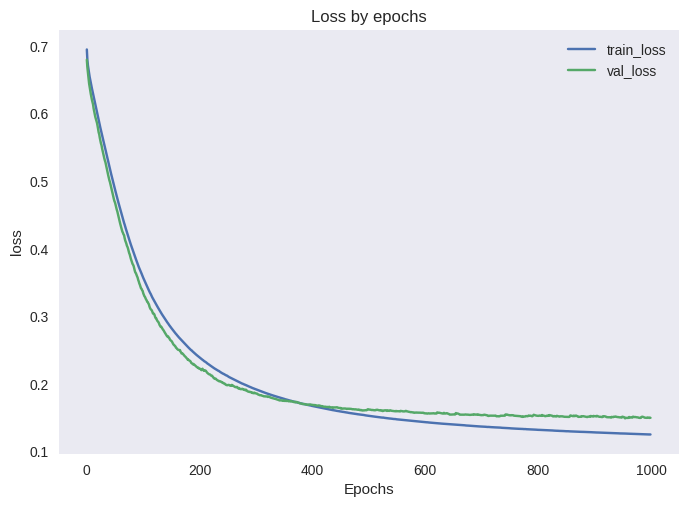

In [ ]:
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(['train_loss', 'val_loss'])
plt.title('Loss by epochs')
plt.show()


In [ ]:
scores = model_20.evaluate(X_test, Y_test)
print('Loss on test data:', scores[0])
print('Accuracy on test data:', scores[1])


4/4 [==============================] - 0s 2ms/step - loss: 0.1318 - accuracy: 0.9537
Loss on test data: 0.1317887008190155
Accuracy on test data: 0.9537037014961243


In [ ]:
res = model_20.predict(df_td)
print('NN output:', res)
#print('Real lung: ', str(np.argmax(Y_test[n:n+1])))
print('NN answer: ', str(np.argmax(res)))

1/1 [==============================] - 0s 16ms/step
NN output: [[0.82578474 0.17421523]]
NN answer:  0


In [ ]:
df_td = pd.read_csv('td.csv')
print(df_td.shape)
print(df_td.dtypes)

df_td

(1, 15)
GENDER          int64
AGE           float64
SMOKING         int64
YELLOW          int64
ANXIETY         int64
PEER            int64
CHRONIC         int64
FATIGUE         int64
ALLERGY         int64
WHEEZING        int64
ALCOHOL         int64
COUGHING        int64
SHORTNESS       int64
SWALLOWING      int64
CHEST           int64
dtype: object


,GENDER,AGE,SMOKING,YELLOW,ANXIETY,PEER,CHRONIC,FATIGUE,ALLERGY,WHEEZING,ALCOHOL,COUGHING,SHORTNESS,SWALLOWING,CHEST
0,0,-5.074651,0,0,1,0,1,1,0,0,0,0,0,0,0


In [ ]:
n=22
result = model_20.predict(X_test[n:n+1])
print('NN output:', result)
print('Real lung: ', str(np.argmax(Y_test[n:n+1])))
print('NN answer: ', str(np.argmax(result)))

1/1 [==============================] - 0s 33ms/step
NN output: [[0.97669744 0.02330258]]
Real lung:  0
NN answer:  0


In [ ]:
print(X_test[n:n+1])
print(Y_test[n:n+1])

     GENDER       AGE  SMOKING  YELLOW  ANXIETY  PEER  CHRONIC  FATIGUE  \
456       1 -0.806057        1       0        0     0        0        1   

     ALLERGY  WHEEZING  ALCOHOL  COUGHING  SHORTNESS  SWALLOWING  CHEST  
456        0         0        0         0          1           0      0  
[[1. 0.]]
